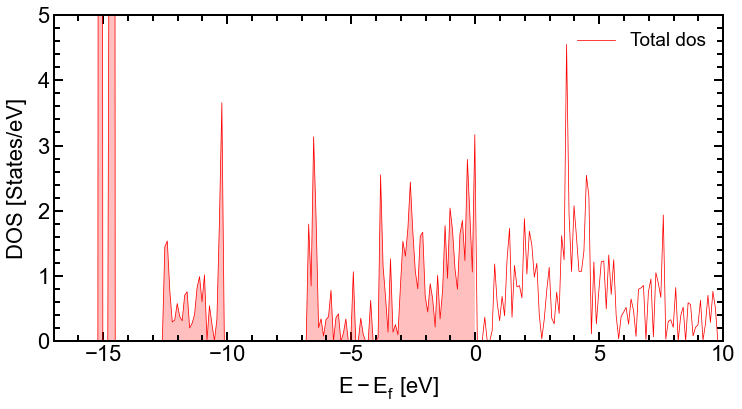

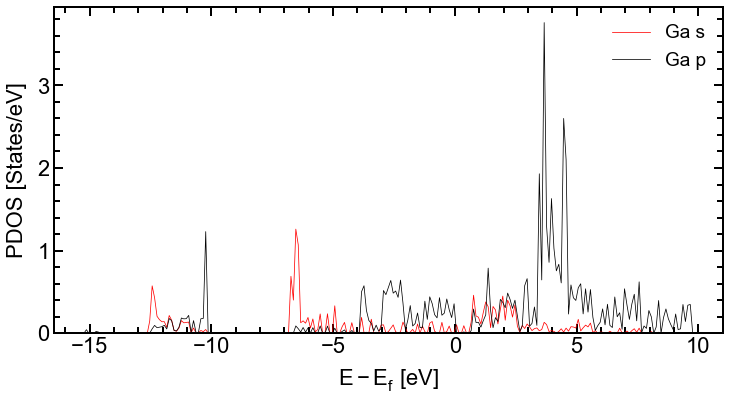

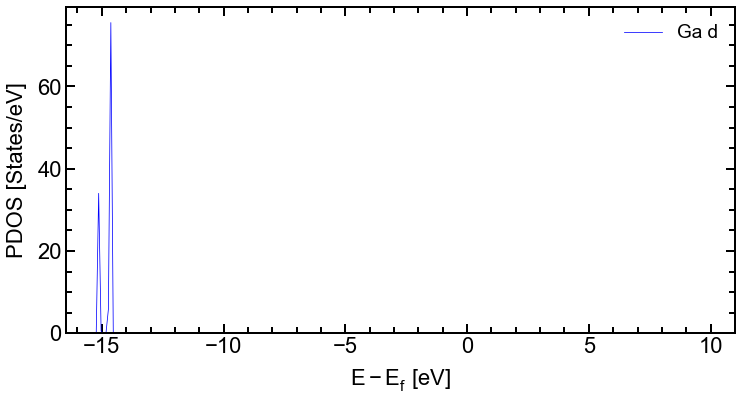

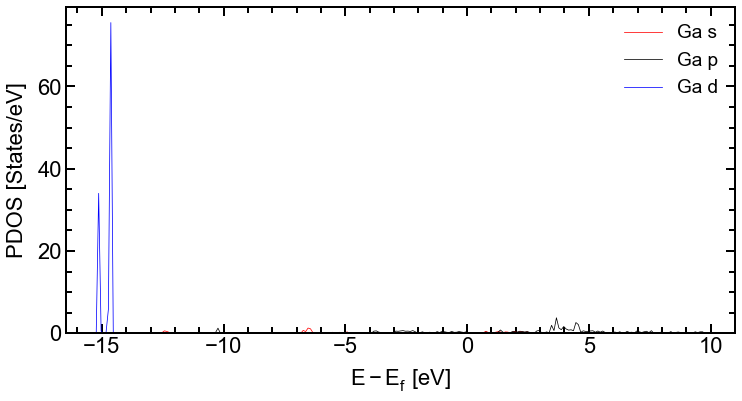

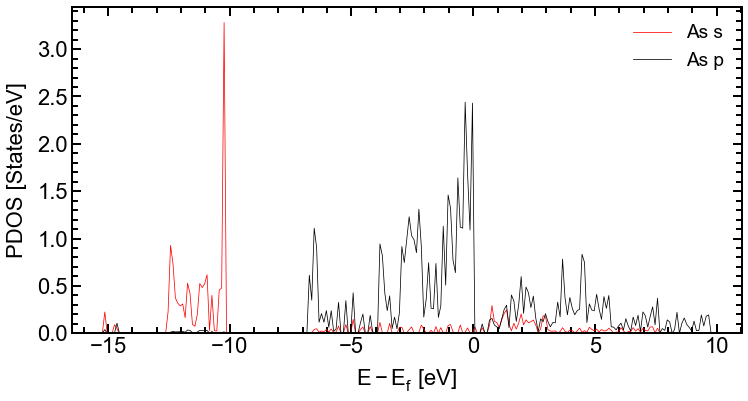

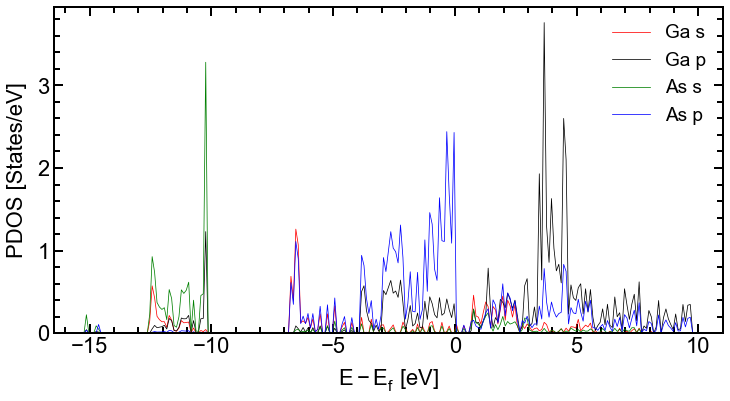

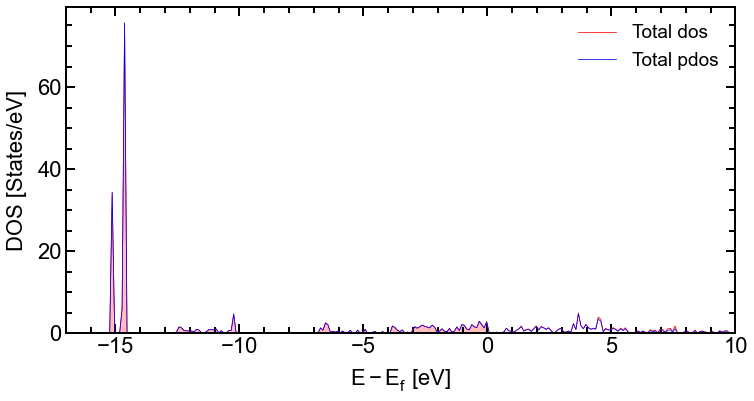

In [1]:
#Projected Dos:

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('sci.mplstyle')

def read_data_dos(file_path):
    """
    Reads data from a file and returns energy, dos, idos, and Fermi energy.

    Args:
    file_path (str): Path to the data file.

    Returns:
    energy (array): Energy values.
    dos (array): DOS values.
    idos (array): Integrated DOS values.
    fermi_energy (float): Fermi energy.
    """
    with open(file_path, 'r') as file:
        for line in file:
            if 'EFermi' in line:
                fermi_energy = float(line.split('=')[1].strip().split()[0])
                break
    energy, dos, idos = np.loadtxt(file_path, unpack=True, skiprows=1)
    energy -= fermi_energy
    return energy, dos, idos, fermi_energy

def read_data_fermiEnergy(file_path_dos):
    """
    Read the Fermi energy from a DOS (Density of States) data file.

    Args:
    file_path_dos (str): Path to the file containing DOS data.

    Returns:
    fermi_energy (float): Fermi energy extracted from the file.
    """
    with open(file_path_dos, 'r') as file:
        for line in file:
            if 'EFermi' in line:
                fermi_energy = float(line.split('=')[1].strip().split()[0])
                break
    return fermi_energy


def read_data(file_path_pdos, fermi_energy):
    """
    Read PDOS (Projected Density of States) data from a file and adjust the energy values.

    Args:
    file_path_pdos (str): Path to the file containing PDOS data.
    fermi_energy (float): Fermi energy used for adjusting the energy values.

    Returns:
    energy (array): Adjusted energy values relative to the Fermi energy.
    pdos (array): PDOS values.
    """
    energy, pdos = np.loadtxt(file_path_pdos, unpack=True, skiprows=1)
    energy -= fermi_energy
    return energy, pdos

def plot_dos(energy, dos, fermi_energy):
    """
    Plots Density of States (DOS) with respect to energy.

    Args:
    energy (array): Energy values.
    dos (array): DOS values.
    fermi_energy (float): Fermi energy.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(energy, dos, linewidth=0.75, color='red', label = 'Total dos')
    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('DOS [States/eV]')
    #plt.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    plt.ylim(0, 5)
    plt.fill_between(energy, 0, dos, where=(energy < 0), facecolor='red', alpha=0.25)
    #plt.text(0, 1.7, 'Fermi energy', rotation=90)
    #plt.title('Density of States')
    plt.xlim(min(energy), max(energy))
    plt.xlim(-17,10)
    plt.legend()
    plt.savefig('dos_total.pdf')
    plt.show()

def Ga_s_p_pdos(Ga_s, Ga_p, fermi_energy):
    """
    Plot the Projected Density of States (PDOS) for Ga atoms, considering s and p orbitals.

    Args:
    Ga_s (str): Path to the file containing Ga s PDOS data.
    Ga_p (str): Path to the file containing Ga p PDOS data.
    fermi_energy (float): Fermi energy.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    
    # Plot Ga s PDOS
    energy, pdos = read_data(Ga_s, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='red', label='Ga s')

    # Plot Ga p PDOS
    energy, pdos = read_data(Ga_p, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='black', label='Ga p')
    
    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('PDOS [States/eV]')
    plt.ylim(0, )
    plt.legend()
    plt.savefig('Ga_s_p_pdos.pdf')
    plt.show()
    
def Ga_d_pdos(Ga_d, fermi_energy):
    """
    Plot the Projected Density of States (PDOS) for Ga atoms, considering d orbitals.

    Args:
    Ga_d (str): Path to the file containing Ga d PDOS data.
    fermi_energy (float): Fermi energy.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))

    energy, pdos = read_data(Ga_d, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='blue', label='Ga d')

    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('PDOS [States/eV]')
    plt.ylim(0, )
    plt.legend()
    plt.savefig('Ga_d_pdos.pdf')
    plt.show()
    
def Ga_s_p_d_pdos(Ga_s, Ga_p, Ga_d, fermi_energy):
    """
    Plot the Projected Density of States (PDOS) for Ga atoms, considering s, p, and d orbitals.

    Args:
    Ga_s (str): Path to the file containing Ga s PDOS data.
    Ga_p (str): Path to the file containing Ga p PDOS data.
    Ga_d (str): Path to the file containing Ga d PDOS data.
    fermi_energy (float): Fermi energy.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    
    # Plot Ga s PDOS
    energy, pdos = read_data(Ga_s, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='red', label='Ga s')

    # Plot Ga p PDOS
    energy, pdos = read_data(Ga_p, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='black', label='Ga p')
    
    # Plot Ga d PDOS
    energy, pdos = read_data(Ga_d, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='blue', label='Ga d')
    
    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('PDOS [States/eV]')
    plt.ylim(0, )
    plt.legend()
    plt.savefig('Ga_s_p_d_pdos.pdf')
    plt.show()
    
def As_s_p_pdos(As_s, As_p, fermi_energy):
    """
    Plot the Projected Density of States (PDOS) for As atoms, considering s and p orbitals.

    Args:
    As_s (str): Path to the file containing As s PDOS data.
    As_p (str): Path to the file containing As p PDOS data.
    fermi_energy (float): Fermi energy.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    
    # Plot As s PDOS
    energy, pdos = read_data(As_s, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='red', label='As s')

    # Plot As p PDOS
    energy, pdos = read_data(As_p, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='black', label='As p')
    
    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('PDOS [States/eV]')
    plt.ylim(0, )
    plt.legend()
    plt.savefig('As_s_p_pdos.pdf')
    plt.show()
    
def GaAs_s_p_pdos(Ga_s, Ga_p, As_s, As_p, fermi_energy):
    """
    Plot the Projected Density of States (PDOS) for Ga and As atoms, considering s and p orbitals.

    Args:
    Ga_s (str): Path to the file containing Ga s PDOS data.
    Ga_p (str): Path to the file containing Ga p PDOS data.
    As_s (str): Path to the file containing As s PDOS data.
    As_p (str): Path to the file containing As p PDOS data.
    fermi_energy (float): Fermi energy.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    
    # Plot Ga s PDOS
    energy, pdos = read_data(Ga_s, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='red', label='Ga s')

    # Plot Ga p PDOS
    energy, pdos = read_data(Ga_p, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='black', label='Ga p')
    
    # Plot As s PDOS
    energy, pdos = read_data(As_s, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='green', label='As s')

    # Plot As p PDOS
    energy, pdos = read_data(As_p, fermi_energy)
    plt.plot(energy, pdos, linewidth=0.75, color='blue', label='As p')
    
    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('PDOS [States/eV]')
    plt.ylim(0, )
    plt.legend()
    plt.savefig('GaAs_s_p_pdos.pdf')
    plt.show()
    
def pdos_dos(pdos_tot, fermi_energy):
    """
    Plot the Total Density of States (DOS) and Total Projected Density of States (PDOS).

    Args:
    pdos_tot (str): Path to the file containing total PDOS data.
    fermi_energy (float): Fermi energy.

    Returns:
    None
    """
    energy, dos, pdos = np.loadtxt(pdos_tot, unpack = True)
    energy -= fermi_energy
    plt.figure(figsize=(12, 6))
    plt.plot(energy, dos, linewidth=0.75, color='red', label = 'Total dos')
    plt.plot(energy, pdos, linewidth=0.75, color='blue', label = 'Total pdos')
    #plt.yticks([])
    plt.xlabel(r'$E - E_f$ [eV]')
    plt.ylabel('DOS [States/eV]')
    #plt.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    plt.ylim(0, )
    plt.fill_between(energy, 0, dos, where=(energy < 0), facecolor='red', alpha=0.25)
    #plt.text(0, 1.7, 'Fermi energy', rotation=90)
    #plt.title('Density of States')
    plt.xlim(min(energy), max(energy))
    plt.xlim(-17,10)
    plt.legend()
    plt.savefig('pdos_dos.pdf')
    plt.show()

# Example usage:
#Total Dos
file_path_dos = 'GaAs.dos'
energy, dos, idos, fermi_energy = read_data_dos(file_path_dos)
plot_dos(energy, dos, fermi_energy)

#Pdos of Ga in GaAs
Ga_s = 'atom_Ga_s.dat'
Ga_p = 'atom_Ga_p.dat'
Ga_d = 'atom_Ga_d.dat'
fermi_energy = read_data_fermiEnergy(file_path_dos)
Ga_s_p_pdos(Ga_s, Ga_p, fermi_energy)
Ga_d_pdos(Ga_d, fermi_energy)
Ga_s_p_d_pdos(Ga_s, Ga_p, Ga_d, fermi_energy)

#Pdos of As in GaAs
As_p = 'atom_As_p.dat'
As_s = 'atom_As_s.dat'
As_s_p_pdos(As_s, As_p, fermi_energy)

#Pdos of Ga and As in GaAs
GaAs_s_p_pdos(Ga_s, Ga_p, As_s, As_p, fermi_energy)

#Total Pdos and Total Dos in GaAs
pdos_tot = 'GaAs.pdos_tot'
pdos_dos(pdos_tot, fermi_energy)